In [1]:
import sys
print(sys.executable)

C:\Users\ottoc\anaconda3\python.exe


In [2]:
import pandas as pd
import seaborn as sb
import scipy.stats as stat
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import pyplot
from apyori import apriori
df = pd.read_csv("US_youtube_trending_data.csv")

In [3]:
print (df.shape)

(106991, 16)


In [6]:
print(df.dtypes)

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object


In [6]:
print(df.describe)

<bound method NDFrame.describe of            video_id                                              title  \
0       3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1       M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2       J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3       kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4       VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   
...             ...                                                ...   
106986  OUYGtSE0a1U           P.O. Box unboxing and living room clean!   
106987  Yov854ZT1lg                                   Starlink Mission   
106988  OBziHxBmoHM                                 AMP SUMO WRESTLING   
106989  Qkj2_lqa3Ng  The TILTED TOWERS Update is HERE! (Dinosaurs, ...   
106990  1YyPPYePY9Q  NLE CHOPPA CAN REALLY HOOP! Basketball Session...   

                 publishedAt                 channelId   channelTitle  \
0   

In [3]:
print(df[['tags','view_count','likes','dislikes','comment_count','description']])

                                                     tags  view_count   likes  \
0       brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1       Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   
2       jacksepticeye|funny|funny meme|memes|jacksepti...     2038853  353787   
3       xxl freshman|xxl freshmen|2020 xxl freshman|20...      496771   23251   
4       The LaBrant Family|DIY|Interior Design|Makeove...     1123889   45802   
...                                                   ...         ...     ...   
106986                                             [None]      363547   26510   
106987       SpaceX|Space|Musk|Satellite|Mission|Starlink      499743   21559   
106988                                             [None]     1397875   99778   
106989  fortnite|fortnite battle royale|competitive|ga...     2485764   75290   
106990  nle choppa|nle|nle choppa basketball|basketbal...     1193496   29234   

        dislikes  comment_c

<AxesSubplot:xlabel='view_count', ylabel='likes'>

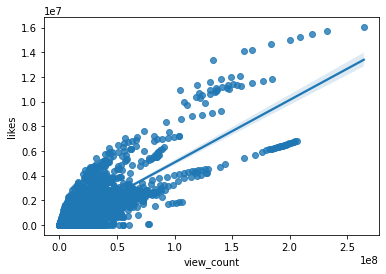

In [6]:
sb.regplot(x="view_count", y="likes", data=df)

<AxesSubplot:xlabel='view_count', ylabel='dislikes'>

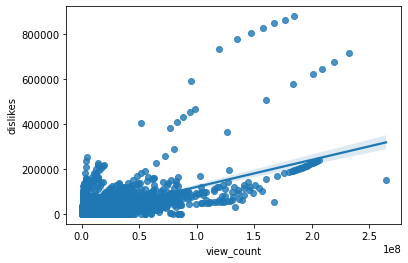

In [8]:
sb.regplot(x="view_count", y="dislikes", data=df)

<AxesSubplot:xlabel='likes', ylabel='dislikes'>

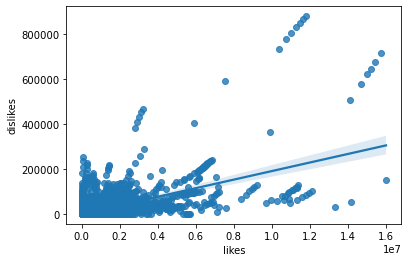

In [9]:
sb.regplot(x="likes", y="dislikes", data=df)

<AxesSubplot:xlabel='view_count', ylabel='comment_count'>

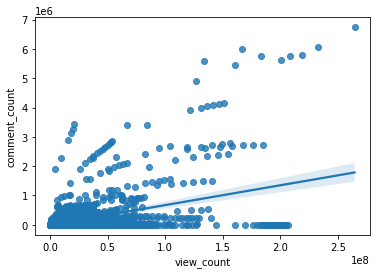

In [10]:
sb.regplot(x="view_count", y="comment_count", data=df)

In [10]:
print(df[['title','likes','dislikes']])

                                                    title   likes  dislikes
0                      I ASKED HER TO BE MY GIRLFRIEND...  156908      5855
1       Apex Legends | Stories from the Outlands – “Th...  146739      2794
2       I left youtube for a month and THIS is what ha...  353787      2628
3       XXL 2020 Freshman Class Revealed - Official An...   23251      1856
4       Ultimate DIY Home Movie Theater for The LaBran...   45802       964
...                                                   ...     ...       ...
106986           P.O. Box unboxing and living room clean!   26510         0
106987                                   Starlink Mission   21559         0
106988                                 AMP SUMO WRESTLING   99778         0
106989  The TILTED TOWERS Update is HERE! (Dinosaurs, ...   75290         0
106990  NLE CHOPPA CAN REALLY HOOP! Basketball Session...   29234         0

[106991 rows x 3 columns]


In [5]:
ndf=df[df["comment_count"]=="0"]
df.drop(ndf.index,axis=0,inplace=True)
print(df[['comment_count','view_count']])
print(ndf)

        comment_count  view_count
0               35313     1514614
1               16549     2381688
2               40221     2038853
3                7647      496771
4                2196     1123889
...               ...         ...
106986            788      363547
106987            872      499743
106988           5088     1397875
106989           3559     2485764
106990            772     1193496

[106991 rows x 2 columns]
Empty DataFrame
Columns: [video_id, title, publishedAt, channelId, channelTitle, categoryId, trending_date, tags, view_count, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, description]
Index: []


In [7]:
print(df.iloc[:,0])

0         3C66w5Z0ixs
1         M9Pmf9AB4Mo
2         J78aPJ3VyNs
3         kXLn3HkpjaA
4         VIUo6yapDbc
             ...     
106986    OUYGtSE0a1U
106987    Yov854ZT1lg
106988    OBziHxBmoHM
106989    Qkj2_lqa3Ng
106990    1YyPPYePY9Q
Name: video_id, Length: 106991, dtype: object


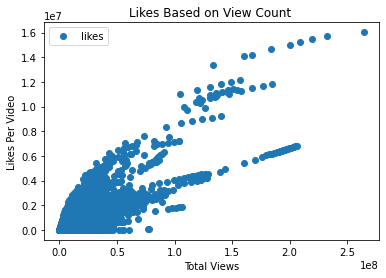

In [11]:
df.plot(x='view_count', y='likes', style='o')
plt.title('Likes Based on View Count ')
plt.xlabel('Total Views')
plt.ylabel('Likes Per Video')
plt.show()
#Plotting view count and likes

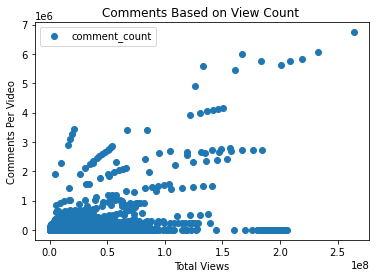

In [6]:
df.plot(x='view_count', y='comment_count', style='o')
plt.title('Comments Based on View Count ')
plt.xlabel('Total Views')
plt.ylabel('Comments Per Video')
plt.show()

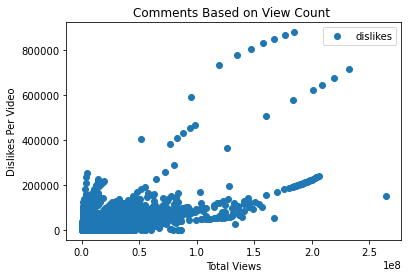

In [212]:
df.plot(x='view_count', y='dislikes', style='o')
plt.title('Comments Based on View Count ')
plt.xlabel('Total Views')
plt.ylabel('Dislikes Per Video')
plt.show()

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [69]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,NaN,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
1,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688.0,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853.0,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
4,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771.0,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...


In [61]:
cdf = df[['view_count','likes','dislikes','comment_count']]
cdf.head(9)

,view_count,likes,dislikes,comment_count
0,NaN,likes,dislikes,comment_count
1,1514614.0,156908,5855,35313
2,2381688.0,146739,2794,16549
3,2038853.0,353787,2628,40221
4,496771.0,23251,1856,7647
5,1123889.0,45802,964,2196
6,949491.0,77487,746,7506
7,470446.0,47990,440,4558
8,1050143.0,89190,854,6455


In [22]:
#Getting the overall evaluation of the data
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 75.52
Mean Absolute Error: 1228016.848524706
Mean Square Error: 10311401686682.273
Root Mean Square Error: 3211137.1329611996


In [12]:
subset=df.sample(n=100)
subset.shape

(100, 16)

In [71]:
'''
Below are the codes to the r code wordclouds I have developed with the Descriptions, Titles, and Tags. I added the Titles and Tags since I figured it wouldn't hurt to have them in a wordcloud as well.
'''

"\nBelow are the codes to the r code wordclouds I have developed with the Descriptions, Titles, and Tags. I added the Titles and Tags since I figured it wouldn't hurt to have them in a wordcloud as well.\n"

In [72]:
from IPython.display import Image

In [ ]:
'''
install.packages("wordcloud")
library(wordcloud)
install.packages("tm")
library(tm)
Tags="C:\\input_files\\Tags"
Tags1=list.files(Tags)
Tags2=paste(Title,"\\",Tags1,sep="")
Tags.corpus=lapply(Tags2,FUN=readLines)
Tags2=paste(Tags,"\\",Tags1,sep="")
Tags.corpus=lapply(Tags2,FUN=readLines)
Tags.corpus2=lapply(Tags.corpus, FUN=paste,collapse=" ")
Tags.corpus3=gsub(pattern="\\W",replace=" ",Tags.corpus2)
Tags.corpus4=gsub(pattern = "\\d",replace=" ",Tags.corpus3)
Tags.corpus5=tolower(Tags.corpus4)
Tags.corpus6=removeWords(Tags.corpus5,stopwords())
Tags.corpus7=gsub(pattern="\\b[A-z]\\b{1}",replace=" ",Tags.corpus6)
Tags.corpus8=stripWhitespace(Tags.corpus7)
wordcloud(Tags.corpus8,min.freq = 25,random.order=FALSE)
'''

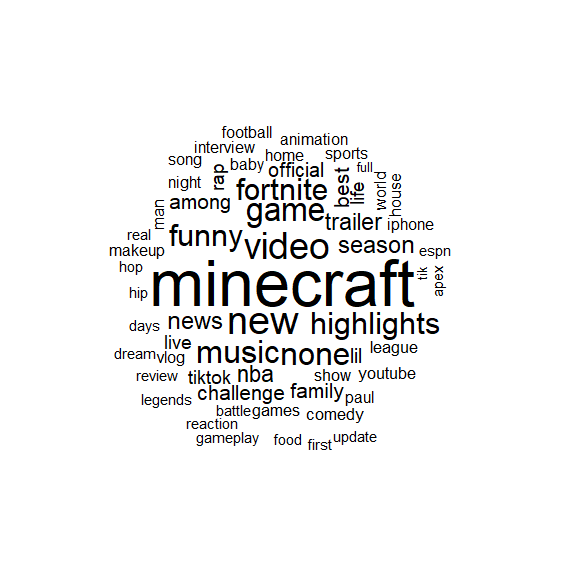

In [76]:
fig = Image(filename=('C:\input_files\WordTags.png'))
fig

In [ ]:
'''
install.packages("wordcloud")
library(wordcloud)
install.packages("tm")
library(tm)
Title="C:\\input_files\\Titles"
Title1=list.files(Title)
Title2=paste(Title,"\\",Title1,sep="")
Title.corpus=lapply(Title2,FUN=readLines)
Title.corpus2=lapply(Title.corpus, FUN=paste,collapse=" ")
Title.corpus3=gsub(pattern="\\W",replace=" ",Title.corpus2)
Title.corpus4=gsub(pattern = "\\d",replace=" ",Title.corpus3)
Title.corpus5=tolower(Title.corpus4)
Title.corpus6=removeWords(Title.corpus5,stopwords())
Title.corpus7=gsub(pattern="\\b[A-z]\\b{1}",replace=" ",Title.corpus6)
Title.corpus8=stripWhitespace(Title.corpus7)
wordcloud(Title.corpus8,min.freq = 25,random.order=FALSE)
'''

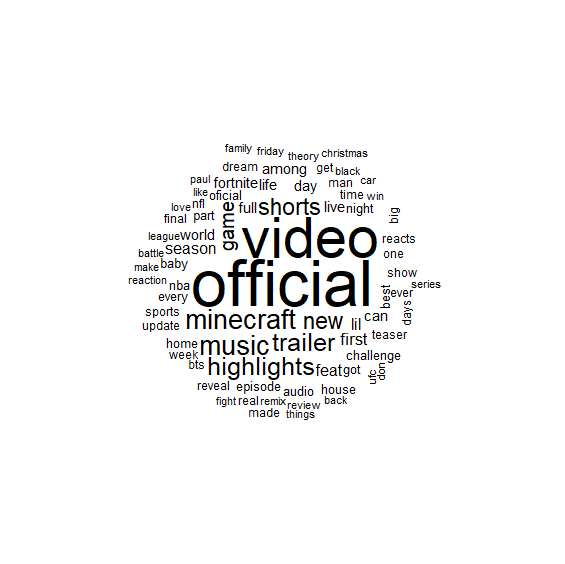

In [78]:
fig1 = Image(filename=('C:\input_files\WordTitles.png'))
fig1

In [ ]:
'''
install.packages("wordcloud")
library(wordcloud)
install.packages("tm")
library(tm)
Description="C:\\input_files\\Descript"
Description1=list.files(Description)
Description2=paste(Description,"\\",Description1,sep="")
save.image("C:\\input_files\\Description Code")
Description.corpus=lapply(Description2,FUN=readLines)
Description.corpus2=lapply(Description.corpus, FUN=paste,collapse=" ")
Description.corpus3=gsub(pattern="\\W",replace=" ",Description.corpus2)
Description.corpus4=gsub(pattern = "\\d",replace=" ",Description.corpus3)
Description.corpus5=tolower(Description.corpus4)
Description.corpus6=removeWords(Description.corpus5,stopwords())
Description.corpus7=gsub(pattern="\\b[A-z]\\b{1}",replace=" ",Description.corpus6)
Description.corpus8=stripWhitespace(Description.corpus7)
wordcloud(Description.corpus8,min.freq = 25,random.order=FALSE)
Description.corpus9=removeWords(Description.corpus8,c("https","com","www","youtube"))
wordcloud(Description.corpus9,min.freq = 25,random.order=FALSE)
Description.corpus10=removeWords(Description.corpus9,c("http","subscribe"))
wordcloud(Description.corpus10,min.freq = 25,random.order=FALSE)
'''

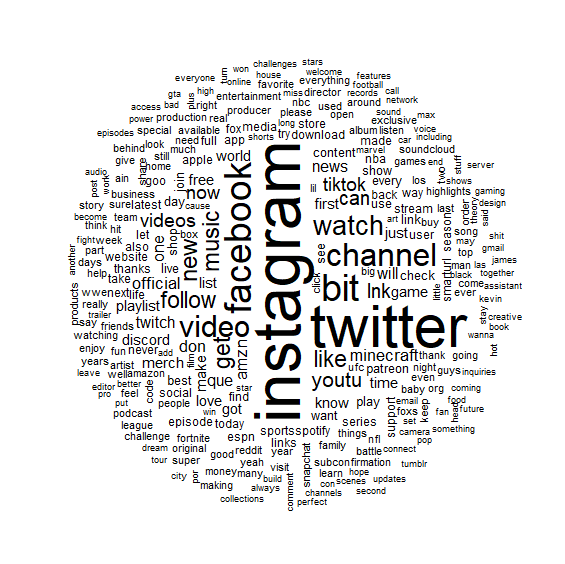

In [80]:
fig2 = Image(filename=('C:\input_files\WordDescription.png'))
fig2

In [185]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
%matplotlib inline

In [196]:
dfcust = df.drop('video_id', axis=1)
dfcust1=dfcust.drop('publishedAt',axis=1)
dfcust2=dfcust1.drop('channelId',axis=1)
dfcust3=dfcust2.drop('channelTitle',axis=1)
dfcust4=dfcust3.drop('categoryId',axis=1)
dfcust5=dfcust4.drop('trending_date',axis=1)
dfcust6=dfcust5.drop('view_count',axis=1)
dfcust7=dfcust6.drop('likes',axis=1)
dfcust8=dfcust7.drop('dislikes',axis=1)
dfcust9=dfcust8.drop('comment_count',axis=1)
dfcust10=dfcust9.drop('thumbnail_link',axis=1)
dfcust11=dfcust10.drop('comments_disabled',axis=1)
dfcust12=dfcust11.drop('ratings_disabled',axis=1)
dfcust12.head()
#dfcust13=dfcust12.drop('tags',axis=1)
#dfcust14=dfcust13.drop('description',axis=1)
#dfcust14.head()

,title,tags,description
0,I ASKED HER TO BE MY GIRLFRIEND...,brawadis|prank|basketball|skits|ghost|funny vi...,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends|Apex Legends characters|new Apex ...,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and THIS is what ha...,jacksepticeye|funny|funny meme|memes|jacksepti...,I left youtube for a month and this is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,xxl freshman|xxl freshmen|2020 xxl freshman|20...,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,Ultimate DIY Home Movie Theater for The LaBran...,The LaBrant Family|DIY|Interior Design|Makeove...,Transforming The LaBrant Family's empty white ...


In [197]:
#dfcust12['tags'] = dfcust12['tags'].astype(float)
#dfcust12['tags'] = pd.to_numeric(dfcust12['tags'],errors='coerce')
#dfcust12['description'] = pd.to_numeric(dfcust12['description'],errors='coerce')

In [203]:
print(dfcust12.dtypes)

title          object
tags           object
description    object
dtype: object


In [200]:
#dfcust12["tags"].replace("|","",inplace=True)
#dfcust12["tags"] = pd.to_numeric(dfcust12["tags"])

In [202]:
#dfclust13["tags"] = pd.to_numeric(dfclust13["tags"], downcast="float")
#print(dfclust13.dtypes)

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(dfcust12)

In [211]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

ValueError: n_samples=3 should be >= n_clusters=4.

In [47]:
import re
import string
import nltk

import pandas as pd

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [48]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ottoc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ottoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
STOP_WORDS = stopwords.words('english')

In [88]:
EMOJI_PATTERN = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

In [101]:
def cleaning(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)
    text = EMOJI_PATTERN.sub(r' ', text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    return text

In [102]:
if __name__ == "__main__":
    max_rows = 1000  # 'None' to read whole file
    input_file = dfcust12

In [114]:
print(dt)

0         brawadis prank basketball skits ghost funny vi...
1         apex legends apex legends characters new apex ...
2         jacksepticeye funny funny meme memes jacksepti...
3         xxl freshman xxl freshmen 2020 xxl freshman 20...
4         the labrant family diy interior design makeove...
                                ...                        
106986                                                none 
106987         spacex space musk satellite mission starlink
106988                                                none 
106989    fortnite fortnite battle royale competitive ga...
106990    nle choppa nle nle choppa basketball basketbal...
Name: tags, Length: 106991, dtype: object


In [133]:
dfcust12['tags'] = dfcust12['tags'].str.replace(' 2 ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' 5 ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' none ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' the ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' new ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' and ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace('none', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' to ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' vs ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' of ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' in ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' a ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' us ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' i ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' s ', ' ')
dfcust12['tags'] = dfcust12['tags'].str.replace(' new', ' ')

In [146]:
dt['tags'] = dfcust12['tags'].str.replace(' the ', ' ')
dt['tags'] = dfcust12['tags'].str.replace('none', ' ')
dt['tags'] = dfcust12['tags'].str.replace(' the', ' ')
dt['tags'] = dfcust12['tags'].str.replace(' new ', ' ')
dt['tags'] = dfcust12['tags'].str.replace(' s', ' ')
dt['tags'] = dfcust12['tags'].str.replace(' how', ' ')

In [147]:
dt = input_file['tags'].apply(cleaning)

In [172]:
word_count = Counter(" ".join(dt).split()).most_common(20)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

          Word  Frequency
0    minecraft      39859
1          the      23640
2        video      20740
3         game      18319
4        music      17052
5         none      16767
6        funny      16601
7   highlights      16579
8     fortnite      16242
9          new      15757
10           s      15719
11        2021      13042
12      season      11214
13        2020      10903
14     trailer      10430
15       among       9909
16         nba       9655
17   challenge       9547
18         how       9225
19      family       9170


In [ ]:
#4/20: Use the new wordcloud to sort tags
#4/22: Have Report Near Finish
#4/24: Work On Poster
#4/26: Final Presentation, Poster, and Report

In [22]:
x=np.array=('likes','dislikes')
y=np.array=('view_count','comment_count')
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 53496  53497  53498 ... 106988 106989 106990] TEST: [    0     1     2 ... 53493 53494 53495]


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)  
association_results = list(association_rules)  

In [ ]:
print(len(association_results))

In [ ]:
print(association_results[0])

In [ ]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

In [17]:
df["view_count"]=df["view_count"].astype('int')
binwidth=int((max(df["view_count"])-min(df["view_count"]))/3)
print(binwidth)
#we build the bin array, from min value to max value, using bin width calculated above.
bins=range(min(df["view_count"]),max(df["view_count"]),binwidth)
print(bins)
#we create labels for each bin: “Low”, “Medium” and “High”.
likes_groups=np.array(['low', 'medium', 'high'])
#we create a column similar to the one with the group price of a car.
df["likes"]=pd.cut(df["likes"],bins=bins, labels=likes_groups)
print(df[['likes','view_count']])
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["view_count"], bins = 3)
# set x/y labels and plot title
plt.pyplot.xlabel("View Count")
plt.pyplot.ylabel("Likes")
plt.pyplot.title("View Count to Likes")

88135796
range(0, 264407389, 88135796)


TypeError: '<' not supported between instances of 'int' and 'str'